In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

# Bernoulli, Binomial, and CLT for Coin Flips

This notebook illustrates the progression from a **single coin flip** (Bernoulli) to **multiple flips** (Binomial), and finally to the **Normal approximation using the Central Limit Theorem (CLT)**.

---

## 1. Bernoulli Distribution (Single Flip)

Each coin flip is a **Bernoulli trial**:

$$
X_i \sim \text{Bernoulli}(p)
$$

- \(X_i = 1\) if heads, \(X_i = 0\) if tails  
- Probability mass function:

$$
P(X_i = 1) = p, \quad P(X_i = 0) = 1 - p
$$

This is shown in the **first panel** of the figure.

---

## 2. Binomial Distribution (Sum of n Flips)

The sum of \(n\) independent Bernoulli trials:

$$
S_n = \sum_{i=1}^{n} X_i \sim \text{Binomial}(n, p)
$$

- PMF (probability of \(k\) heads):

$$
P(S_n = k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k = 0,1,2,...,n
$$

- Mean and variance:

$$
\mathbb{E}[S_n] = n p, \quad \text{Var}(S_n) = n p (1-p)
$$

The **second panel** of the figure shows the histogram of sums from multiple trials.

---

## 3. Central Limit Theorem (CLT) Approximation

For large \(n\), the binomial distribution can be approximated by a **Normal distribution**:

$$
S_n \approx \mathcal{N}(\mu, \sigma^2), \quad \mu = n p, \quad \sigma^2 = n p (1-p)
$$

- This is the **third panel** (red curve).  
- Since the binomial is discrete, we apply **continuity correction** for better approximation:

$$
P(S_n = k) \approx \Phi\left(\frac{k + 0.5 - \mu}{\sigma}\right) - 
\Phi\left(\frac{k - 0.5 - \mu}{\sigma}\right)
$$

where \Phi is the CDF of the standard normal distribution.

---

## 4. Key Observations

1. **Bernoulli**: only two outcomes (0 or 1).  
2. **Binomial**: sum of n Bernoullis → discrete distribution.  
3. **CLT / Normal Approximation**:  
   - Smooth curve approximates binomial PMF  
   - Accuracy improves as n increases  
   - Continuity correction makes the match almost perfect even for small n  

This visualization shows **how sums of independent random variables converge to a normal distribution**, which is the essence of the Central Limit Theorem.


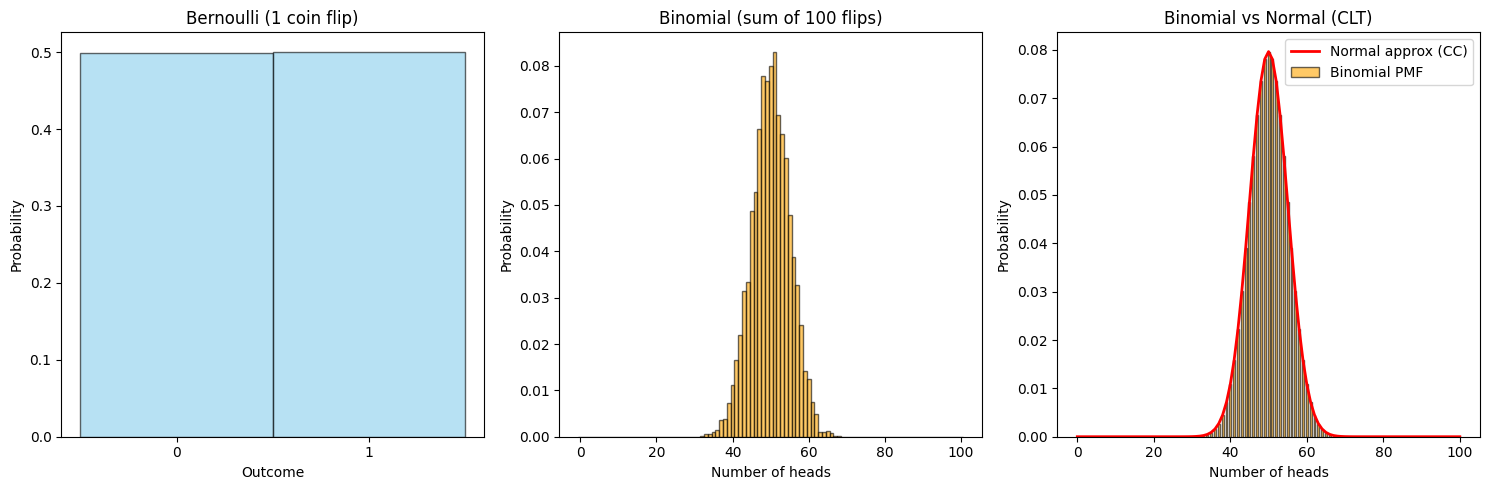

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

# Parameters
n = 100     # number of coin flips
p = 0.5
trials = 10000

# 1. Bernoulli samples (single flip)
bernoulli_samples = np.random.binomial(1, p, size=trials)

# 2. Binomial samples (sum of n flips)
binomial_samples = np.random.binomial(n, p, size=trials)

# 3. CLT approximation (Normal with continuity correction)
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
x = np.arange(0, n+1)
# Continuity correction
normal_cc = norm.cdf(x + 0.5, mu, sigma) - norm.cdf(x - 0.5, mu, sigma)

# Plot
plt.figure(figsize=(15,5))

# --- Bernoulli ---
plt.subplot(1,3,1)
plt.hist(bernoulli_samples, bins=[-0.5,0.5,1.5], density=True, 
         alpha=0.6, color='skyblue', edgecolor='black')
plt.xticks([0,1])
plt.title('Bernoulli (1 coin flip)')
plt.xlabel('Outcome')
plt.ylabel('Probability')

# --- Binomial ---
plt.subplot(1,3,2)
plt.hist(binomial_samples, bins=np.arange(-0.5, n+1.5), density=True, 
         alpha=0.6, color='orange', edgecolor='black')
plt.title(f'Binomial (sum of {n} flips)')
plt.xlabel('Number of heads')
plt.ylabel('Probability')

# --- Binomial vs Normal (CLT with continuity correction) ---
plt.subplot(1,3,3)
plt.bar(x, binom.pmf(x, n, p), width=0.5, alpha=0.6, 
        color='orange', edgecolor='black', label='Binomial PMF')
plt.plot(x, normal_cc, 'r-', lw=2, label='Normal approx (CC)')
plt.title(f'Binomial vs Normal (CLT)')
plt.xlabel('Number of heads')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()


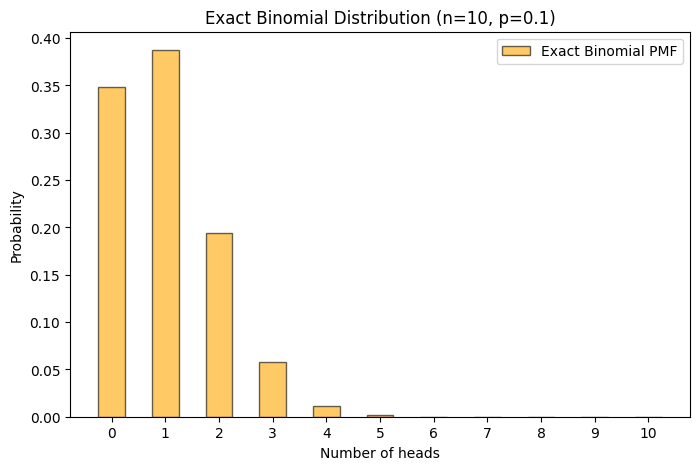

P(X = 0) = 0.3487
P(X = 1) = 0.3874
P(X = 2) = 0.1937
P(X = 3) = 0.0574
P(X = 4) = 0.0112
P(X = 5) = 0.0015
P(X = 6) = 0.0001
P(X = 7) = 0.0000
P(X = 8) = 0.0000
P(X = 9) = 0.0000
P(X = 10) = 0.0000


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 10         # number of coin flips
p = 0.1        # rare event
x = np.arange(0, n+1)

# Exact binomial PMF
binom_pmf = binom.pmf(x, n, p)

# Cumulative probability (optional)
binom_cdf = binom.cdf(x, n, p)

# Plot exact binomial PMF
plt.figure(figsize=(8,5))
plt.bar(x, binom_pmf, width=0.5, alpha=0.6, color='orange', edgecolor='black', label='Exact Binomial PMF')
plt.title(f'Exact Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of heads')
plt.ylabel('Probability')
plt.xticks(x)
plt.legend()
plt.show()

# Optional: print probabilities
for k, prob in zip(x, binom_pmf):
    print(f"P(X = {k}) = {prob:.4f}")


# Exact Binomial Distribution (Small Sample / Rare Event)

For small sample sizes or skewed probabilities, the **exact binomial distribution** gives the true probabilities:

- **Probability Mass Function (PMF)**:

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k = 0,1,\dots,n
$$

- **Cumulative Distribution Function (CDF)**:

$$
P(X \le k) = \sum_{i=0}^{k} \binom{n}{i} p^i (1-p)^{n-i}
$$

### Why use exact binomial?

1. **Small n (<30)** → Normal approximation may be inaccurate  
2. **Skewed p (rare events)** → Normal approximation can misrepresent probability mass  
3. Exact PMF gives **correct probabilities for each outcome**  

In this example (n=10, p=0.1), we can see that most of the probability is concentrated at 0 or 1 heads — the normal approximation would **spread it out incorrectly**.
